In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np

train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F # can just nn or F

In [40]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #run nn.Model and self __init__
        self.fc1 = nn.Linear(28*28, 64) # 784 from flatten 28*28
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [41]:
x = torch.rand((28,28))
x = x.view(-1, 28*28) # -1 for any size
output = net(x)
output

tensor([[-2.2012, -2.2924, -2.1340, -2.4302, -2.3224, -2.2109, -2.4411, -2.2838,
         -2.3838, -2.3738]], grad_fn=<LogSoftmaxBackward>)

In [42]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=1e-3)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        x, y = data
        net.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0441, grad_fn=<NllLossBackward>)
tensor(0.1046, grad_fn=<NllLossBackward>)
tensor(0.2350, grad_fn=<NllLossBackward>)


In [43]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        x, y = data
        output = net(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Acc:", round(correct/total, 3) )

Acc: 0.974


<IPython.core.display.Javascript object>


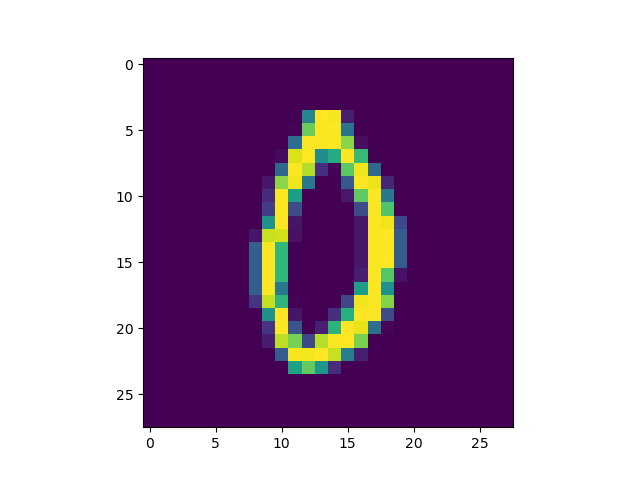

tensor(0)


In [64]:
import matplotlib.pyplot as plt
i = 1
plt.imshow(x[i].view(28,28))
print(torch.argmax(net(x[i].view(-1,784))[0]))